In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
iris = pd.read_csv('iris.data', sep=',', names=['sepal_lenght', 'sepal_width', 'petal_lenght', 'petal_width', 'iris_species'])

In [4]:
iris.head()

,sepal_lenght,sepal_width,petal_lenght,petal_width,iris_species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# Descriptive statistics

In [5]:
# We use .T to transpose the dataset
iris.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal_lenght,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal_width,150.0,3.054000,0.433594,2.0,2.8,3.00,3.3,4.4
petal_lenght,150.0,3.758667,1.764420,1.0,1.6,4.35,5.1,6.9
petal_width,150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5


In [6]:
# We check for missing values
iris.isna().any()

sepal_lenght    False
sepal_width     False
petal_lenght    False
petal_width     False
iris_species    False
dtype: bool

In [7]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_lenght  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_lenght  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   iris_species  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


## There are no missing values in the dataset

In [8]:
# Let's transform the iris_species column. The dataset is composed only of Iris, so it's not necessary to have Iris in the name. We can remove and leave only "setosa"
iris_transformed = iris
iris_transformed['iris_species'] = iris_transformed['iris_species'].str.replace('Iris-','')
iris_transformed = iris_transformed.rename(columns={'iris_species':'species_descr'})

In [16]:
# We create a column with a code for the species. Computer systems process numerical data better
specie_code = {'setosa':0, 'versicolor':1, 'virginica':2}
iris_transformed['species_code'] = iris_transformed['species'].map(specie_code)

In [18]:
# Saving transformed dataset to csv
iris_transformed.to_csv('iris_transformed', index=False)

In [19]:
iris_transformed.head()

,sepal_lenght,sepal_width,petal_lenght,petal_width,species,species_code
0,5.1,3.5,1.4,0.2,setosa,0
1,4.9,3.0,1.4,0.2,setosa,0
2,4.7,3.2,1.3,0.2,setosa,0
3,4.6,3.1,1.5,0.2,setosa,0
4,5.0,3.6,1.4,0.2,setosa,0


## Some graph analysis
## Relations of the width and lenght measures od petals and sepals of each species

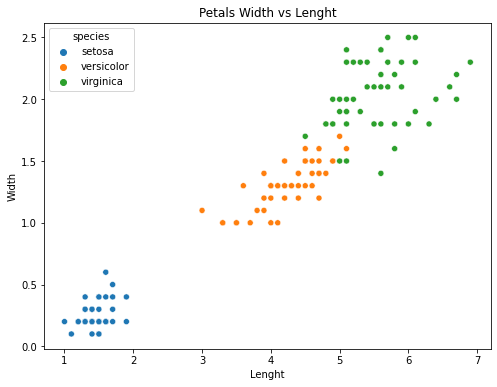

In [10]:
# Using scatterplot
plt.figure(figsize=(8,6))
sns.scatterplot(
                data = iris_transformed
                , x='petal_lenght'
                , y='petal_width'
                , hue='species')
plt.title('Petals Width vs Lenght')
plt.xlabel('Lenght')
plt.ylabel('Width')
plt.show()

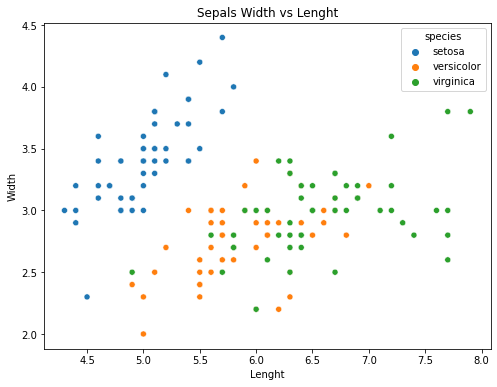

In [11]:
plt.figure(figsize=(8,6))
sns.scatterplot(
                data=iris_transformed
                , x='sepal_lenght'
                , y='sepal_width'
                , hue='species')
plt.title('Sepals Width vs Lenght')
plt.xlabel('Lenght')
plt.ylabel('Width')
plt.show()

## Find out how the measures are distributed

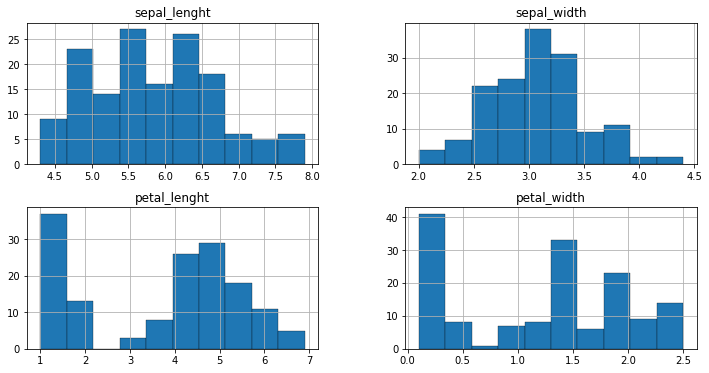

In [12]:
# histogram
iris_transformed.hist(figsize=(12,6), edgecolor='black', linewidth=0.3)
plt.show()

## Analyzing peer relationships and marginal distributions

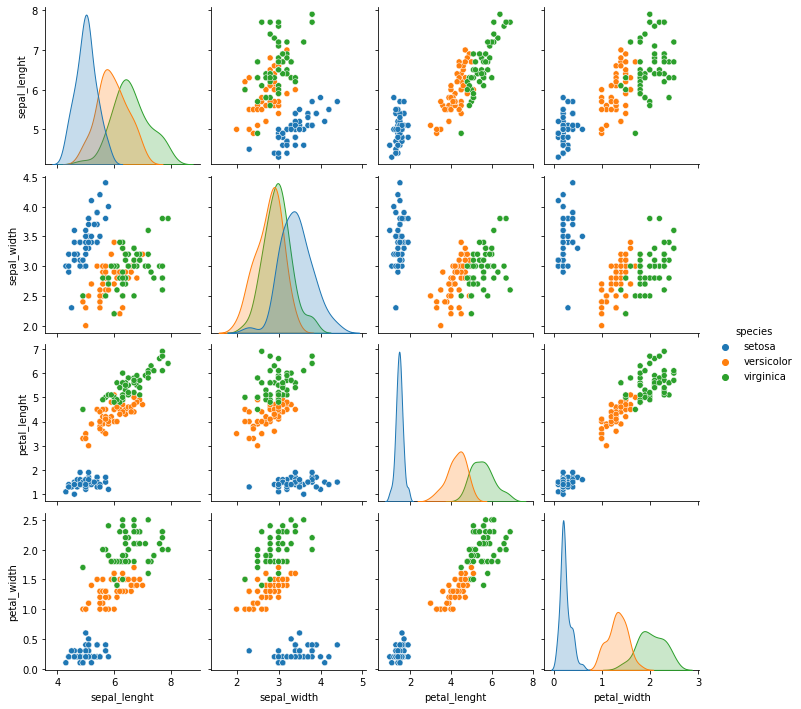

In [13]:
# pairplot
sns.pairplot(iris_transformed, hue='species')

## Distribution of quantitative data at levels of categorical variables, so these distributions can be compared

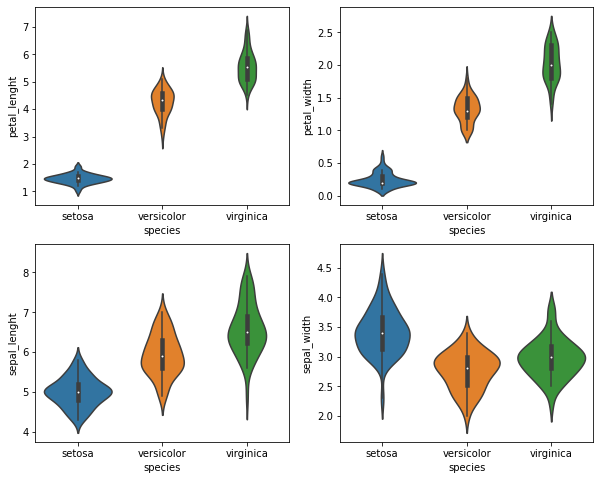

In [14]:
# violinplot
plt.figure(figsize=(10,8))
plt.subplot(2,2,1)
sns.violinplot(x='species', y='petal_lenght', data=iris_transformed)
plt.subplot(2,2,2)
sns.violinplot(x='species', y='petal_width', data=iris_transformed)
plt.subplot(2,2,3)
sns.violinplot(x='species', y='sepal_lenght', data=iris_transformed)
plt.subplot(2,2,4)
sns.violinplot(x='species', y='sepal_width', data=iris_transformed)
plt.show()